In [1]:
# Importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout


import os 
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#downloading the data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /cats_and_dogs_filtered.zip

--2020-12-14 07:12:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/cats_and_dogs_filtered.zip’

/cats_and_dogs_filt 100%[===================>]  65.43M   124MB/s    in 0.5s    

2020-12-14 07:12:15 (124 MB/s) - ‘/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Unzipping the data
dataset_path = "/cats_and_dogs_filtered.zip"

zip_object = zipfile.ZipFile(file =dataset_path, mode="r")

zip_object.extractall("./")
zip_object.close()

In [4]:
#Creating directory
dataset_path_new = "/content/cats_and_dogs_filtered"

train_dir = os.path.join(dataset_path_new, "train")

valid_dir = os.path.join(dataset_path_new, "validation")

In [5]:
# Instantiating the Image data generator
data_gen_train = ImageDataGenerator(rescale=1/255)

data_gen_valid = ImageDataGenerator(rescale=1/255)

In [6]:
#Scaling the data
train_gen = data_gen_train.flow_from_directory(train_dir, target_size=(128,128),
                                               batch_size = 128, class_mode = "binary")

valid_gen = data_gen_train.flow_from_directory(valid_dir, target_size=(128,128),
                                               batch_size = 128, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# Building the body of the model Using VGG19
base_model = tf.keras.applications.VGG19(input_shape=(128,128,3), weights="imagenet", include_top=False)

#freaaxing the layer
for layer in base_model.layers:
  layer.trainable= False

80142336/80134624 [==============================] - 0s 0us/step


In [8]:
#Creating the Head of the model
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)

prediction_layer = Dense(units=2, activation="softmax")(model)

In [9]:
# Joining the head and body
model = Model(inputs= base_model.input, outputs = prediction_layer)

In [10]:
#Summarising the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [11]:
# Compiling and training 
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit_generator(train_gen, epochs=6, validation_data=valid_gen)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/6
16/16 [==============================] - 11s 693ms/step - loss: 1.3152 - sparse_categorical_accuracy: 0.6270 - val_loss: 0.4099 - val_sparse_categorical_accuracy: 0.8060
Epoch 2/6
16/16 [==============================] - 8s 517ms/step - loss: 0.3960 - sparse_categorical_accuracy: 0.8135 - val_loss: 0.3456 - val_sparse_categorical_accuracy: 0.8460
Epoch 3/6
16/16 [==============================] - 8s 511ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.3188 - val_sparse_categorical_accuracy: 0.8650
Epoch 4/6
16/16 [==============================] - 8s 514ms/step - loss: 0.2448 - sparse_categorical_accuracy: 0.8915 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.8410
Epoch 5/6
16/16 [==============================] - 8s 510ms/step - loss: 0.1800 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.2994 - val_sparse_categorical_accuracy: 0.8670
Epoch 6/6
16/16 [===========

Text(0.5, 1.0, 'Training-Validation Accuracy')

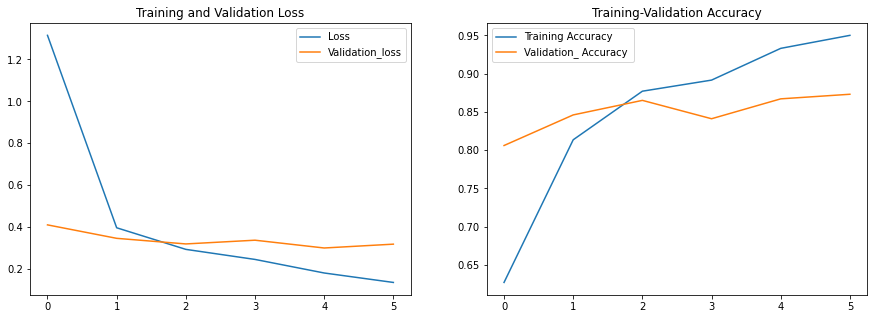

In [12]:
#saving the losses
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

# Transfer learning Using Mobile Net architecture

In [15]:
# Building the body of the model Using VGG19
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3), weights="imagenet", include_top=False)

#freaaxing the layer
for layer in base_model.layers:
  layer.trainable= False

In [17]:
#Creating the Head of the model
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)

prediction_layer = Dense(units=2, activation="softmax")(model)

In [18]:
# Joining the head and body
model = Model(inputs= base_model.input, outputs = prediction_layer)

In [19]:
#Summarising the model
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [20]:
# Compiling and training 
model.compile(optimizer='adam', loss = "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

model.fit_generator(train_gen, epochs=6, validation_data=valid_gen)


Epoch 1/6
16/16 [==============================] - 8s 505ms/step - loss: 10.2743 - sparse_categorical_accuracy: 0.6315 - val_loss: 0.1511 - val_sparse_categorical_accuracy: 0.9610
Epoch 2/6
16/16 [==============================] - 7s 454ms/step - loss: 0.2320 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.1387 - val_sparse_categorical_accuracy: 0.9640
Epoch 3/6
16/16 [==============================] - 7s 449ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.1180 - val_sparse_categorical_accuracy: 0.9620
Epoch 4/6
16/16 [==============================] - 7s 452ms/step - loss: 0.0318 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.0758 - val_sparse_categorical_accuracy: 0.9760
Epoch 5/6
16/16 [==============================] - 7s 449ms/step - loss: 0.0103 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.0748 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/6
16/16 [==============================] - 7s 452ms/step - loss: 0.0030 - sparse_categorical_acc

Text(0.5, 1.0, 'Training-Validation Accuracy')

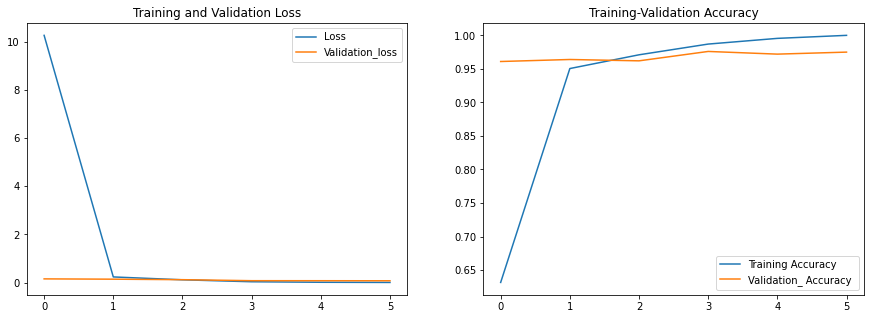

In [21]:
#saving the losses
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")